In [1]:
import re
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.figsize'] = (15, 5)
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [2]:

def splliter(data, i):
    f = lambda a: float(a.replace(',', '.'))

    splitted = list(filter(''.__ne__, data.split('\n')))
    splitted = [re.split(' +', re.split(': +', l)[1]) for l in splitted[i:]]
    splitted = [list(map(f, l)) for l in splitted]
    splitted = [sum(l) / len(l) for l in splitted]

    return splitted


def oneRecordToDict(r):
    times = r[0]
    access = r[1]

    spllited = list(filter(''.__ne__, times.split('\n')))
    params = spllited[0][1:-1].split(', ')
    for i in range(1, len(params)):
        params[i] = int(params[i])

    d = {}
#     d['subject'] = params[0]
    d['p_numb'] = params[1]
    d['c_numb'] = params[2]
    d['bufferSize'] = params[3]
    d['optNumbCoeff'] = params[4]
    d['complReqOptNumbCoeff'] = params[5]
    d['actionCostCoeff'] = params[6]
    

    timesSplit = splliter(times, 3)

    d['p_time'] = timesSplit[0]
    d['p_cput'] = timesSplit[1]
    d['p_meas.'] = timesSplit[2]
    d['c_time'] = timesSplit[3]
    d['c_cput'] = timesSplit[4]
    d['c_meas.'] = timesSplit[5]

    accessSplit = splliter(access, 1)

    d['p_access'] = accessSplit[0]
    d['p_compl'] = accessSplit[1]
    d['p_ratio'] = accessSplit[2]
    d['c_access'] = accessSplit[3]
    d['c_compl'] = accessSplit[4]
    d['c_ratio'] = accessSplit[5]
    return d


def parse(path):
    content = ""
    with open(path) as fh:
        content = fh.read()
    content = content.replace("tasks", "tasks:").replace("times", "times:").replace("ratios", "ratios:")
    measures = re.split("_+\n", content)
    measures = [re.split("-+\n", m) for m in measures][:-1]

    measures = [oneRecordToDict(r) for r in measures]

    measures = pd.DataFrame.from_records(measures)

    return measures


# Loading results

In [3]:
pathBuffer = 'res-buffer.txt'
pathActObject = 'res-actObject.txt'
pathFinalBuffer = 'res-final-buffer.txt'
pathFinalActObject = 'res-final-actObject.txt'

measuresBufferFull = parse(pathBuffer)
measuresActObjectFull = parse(pathActObject)

finalMeasuresBuffer = parse(pathFinalBuffer)
df = finalMeasuresBuffer
index_names = df[ df['p_numb'] == 6 ].index
df.drop(index_names, inplace = True)
index_names = df[ df['p_numb'] == 10 ].index
df.drop(index_names, inplace = True)


finalMeasuresActObject = parse(pathFinalActObject)
df = finalMeasuresActObject
index_names = df[ df['p_numb'] == 6 ].index
df.drop(index_names, inplace = True)
index_names = df[ df['p_numb'] == 10 ].index
df.drop(index_names, inplace = True)

important params:<br>

    'p_numb', 'c_num', 'bufferSize', 'optNumbCoeff', 'complReqOptNumbCoeff', 'actionCostCoeff',

results:<br>

    'p_time', 'p_cput', 'p_meas.', 'c_time', 'c_cput', 'c_meas.',

    'p_access', 'p_compl', 'p_ratio', 'c_access', 'c_compl', 'c_ratio'

----------------------------------------------------------------------------------------- <br>
accessMethods=(buffer actObject)

workersNumb=(3 6 10 12) <br>
bufferSizes=(100 1000 10000)

optNumbCoeffs=(10 50 100 150 200 250) <br>
actionCostCoeffs=(1 10 20 50 80) <br>
complReqOptNumbCoeffs=(10 50 100 200) <br>
secondsOfMeasuring=6 



In [4]:
getOnlyResults = lambda dataFrame: dataFrame[['p_time', 'p_cput', 'p_meas.', 'c_time', 'c_cput', 'c_meas.', 'p_access', 'p_compl', 'p_ratio', 'c_access', 'c_compl', 'c_ratio']]

In [5]:
onlyResultsForBuffer = getOnlyResults(measuresBufferFull)
onlyResultsForActObject = getOnlyResults(measuresActObjectFull)

finalOnlyResultsForBuffer = getOnlyResults(finalMeasuresBuffer)
finalOnlyResultsForFinalActObject = getOnlyResults(finalMeasuresActObject)

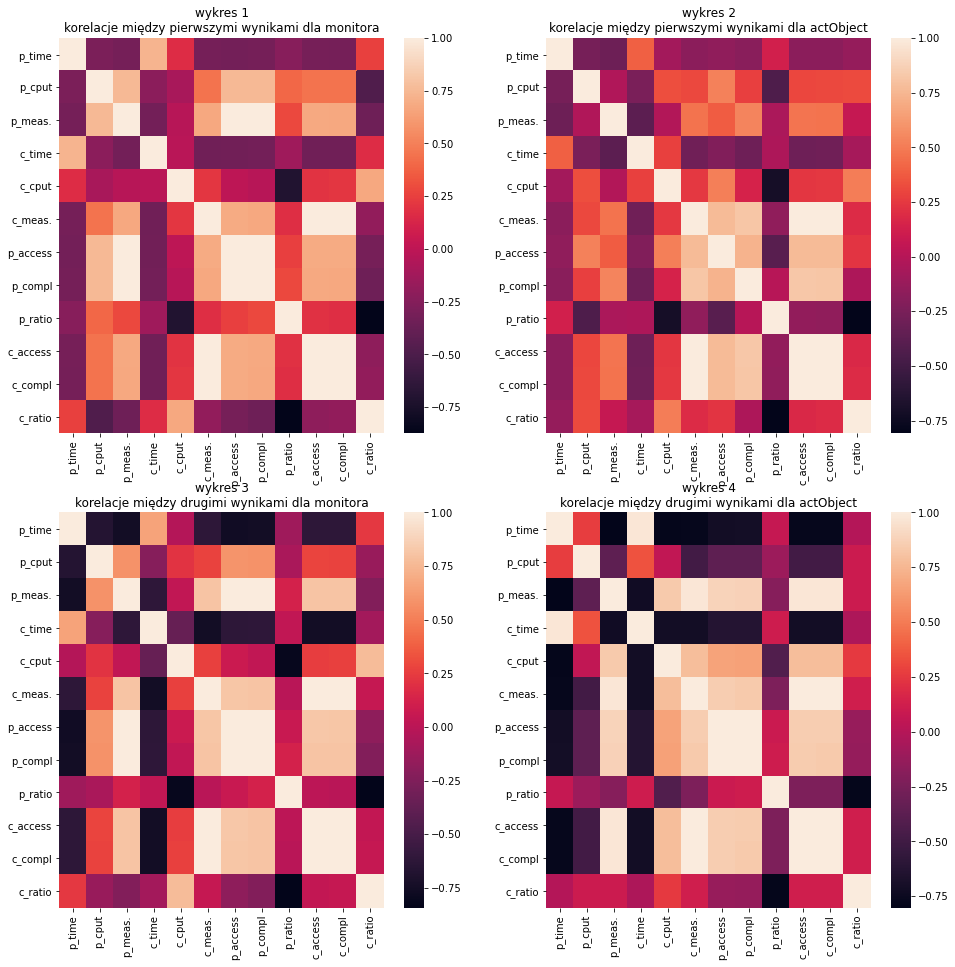

In [61]:
fig = plt.figure(figsize=(16, 16))

ax = fig.add_subplot(2, 2, 1)
p1 = sns.heatmap(onlyResultsForBuffer.corr()).set(title='wykres 1\nkorelacje między pierwszymi wynikami dla monitora')

ax = fig.add_subplot(2, 2, 2)
p2 = sns.heatmap(onlyResultsForActObject.corr()).set(title='wykres 2\nkorelacje między pierwszymi wynikami dla actObject')

ax = fig.add_subplot(2, 2, 3)
p3 = sns.heatmap(finalOnlyResultsForBuffer.corr()).set(title='wykres 3\nkorelacje między drugimi wynikami dla monitora')

ax = fig.add_subplot(2, 2, 4)
p4 = sns.heatmap(finalOnlyResultsForFinalActObject.corr()).set(title='wykres 4\nkorelacje między drugimi wynikami dla actObject')

fig.savefig('korelacje.png')

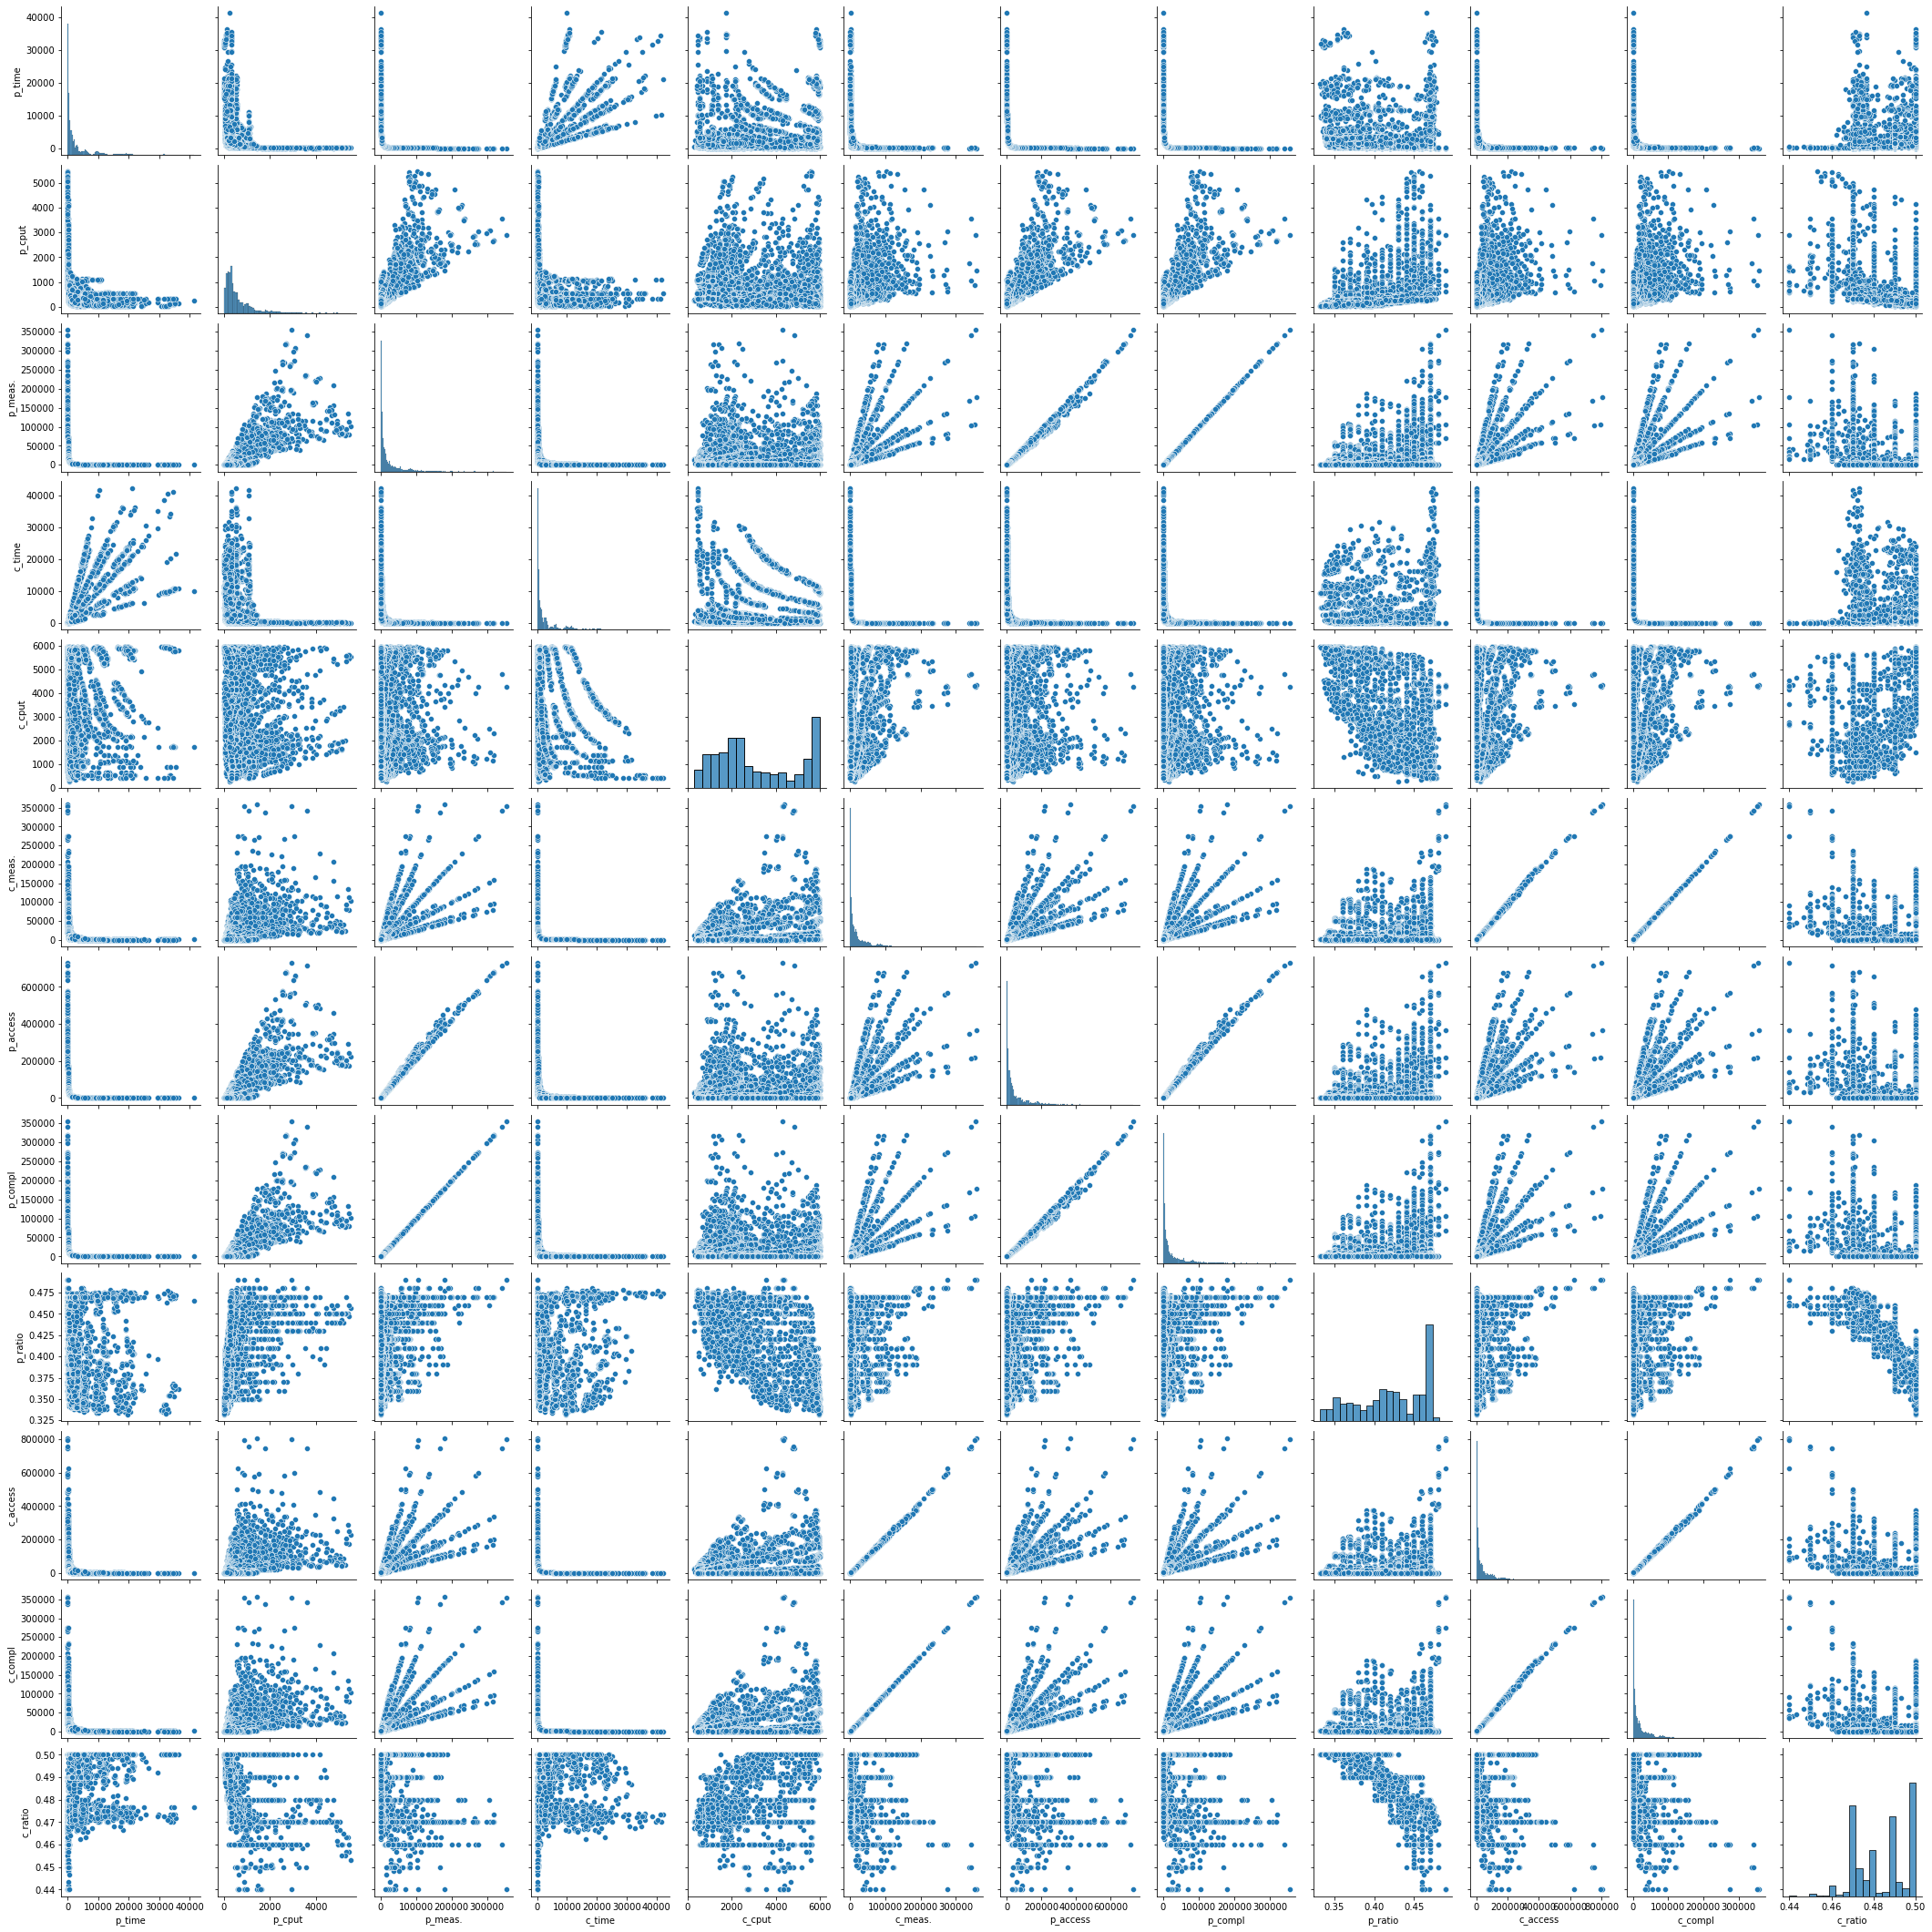

In [7]:
# k1 = sns.pairplot(onlyResultsForBuffer)
# k1.fig.savefig('pair1.png')

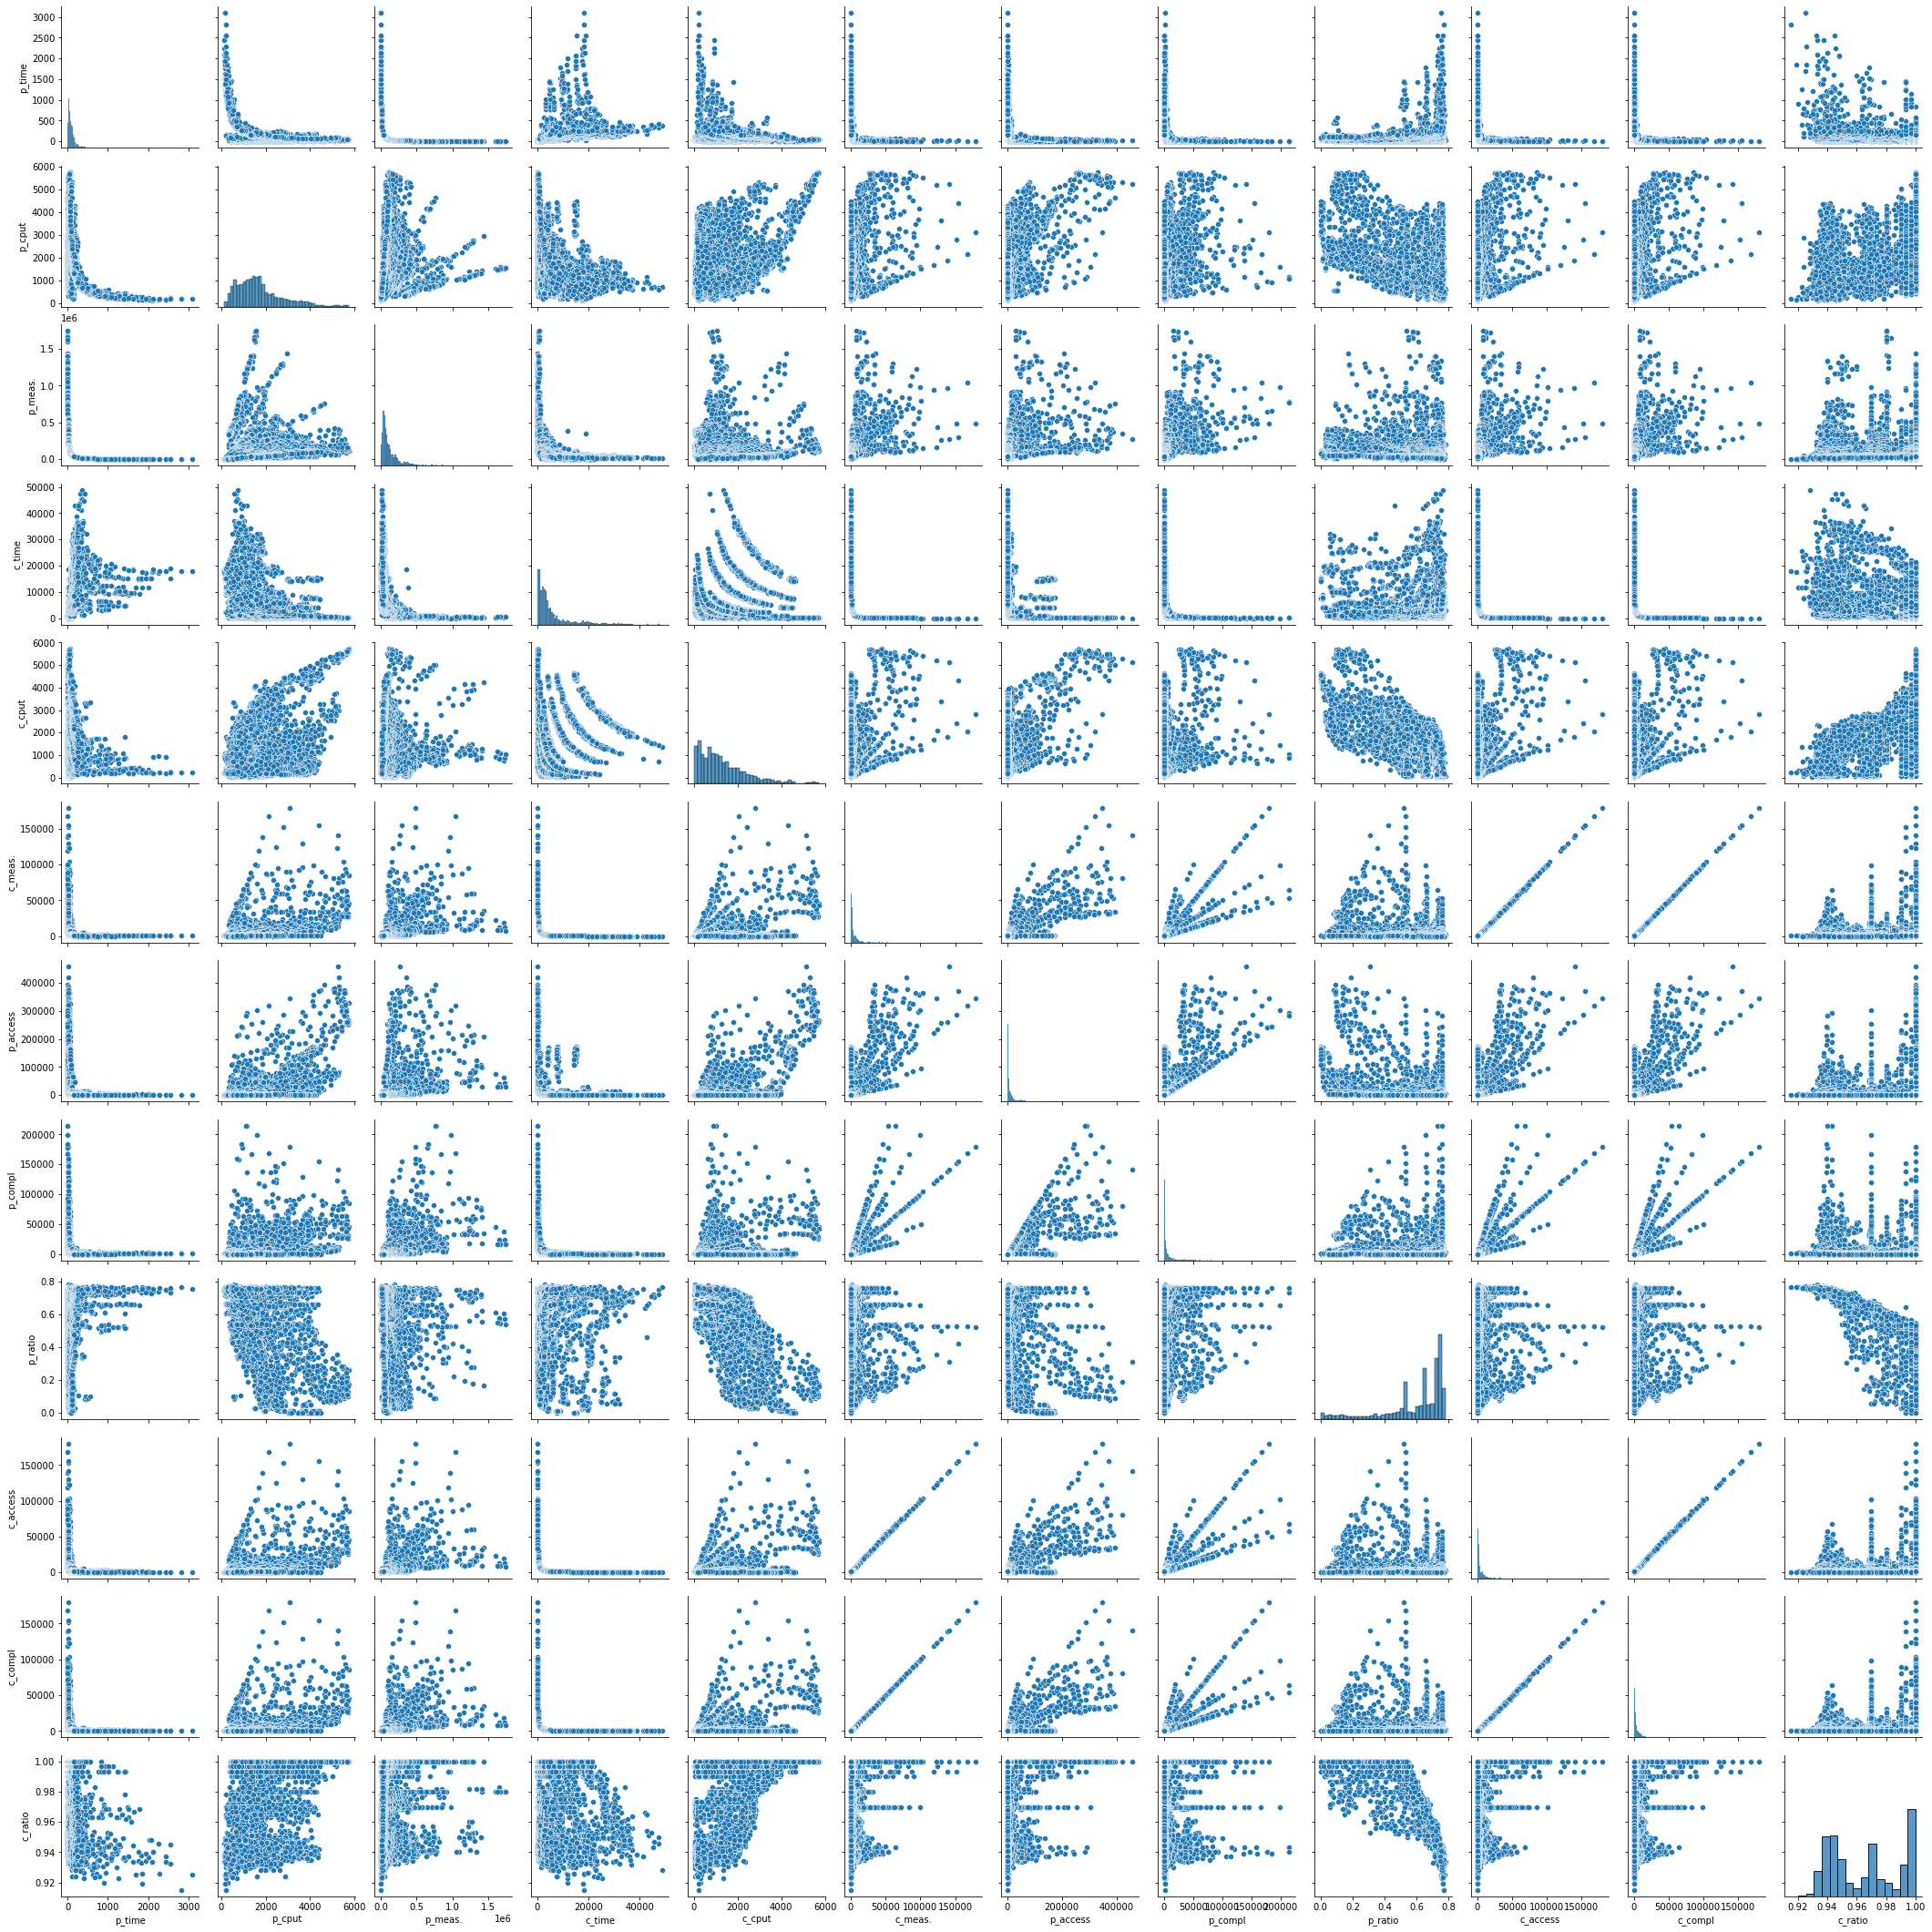

In [8]:
# k2 = sns.pairplot(onlyResultsForActObject)
# k2.fig.savefig('pair2.png')

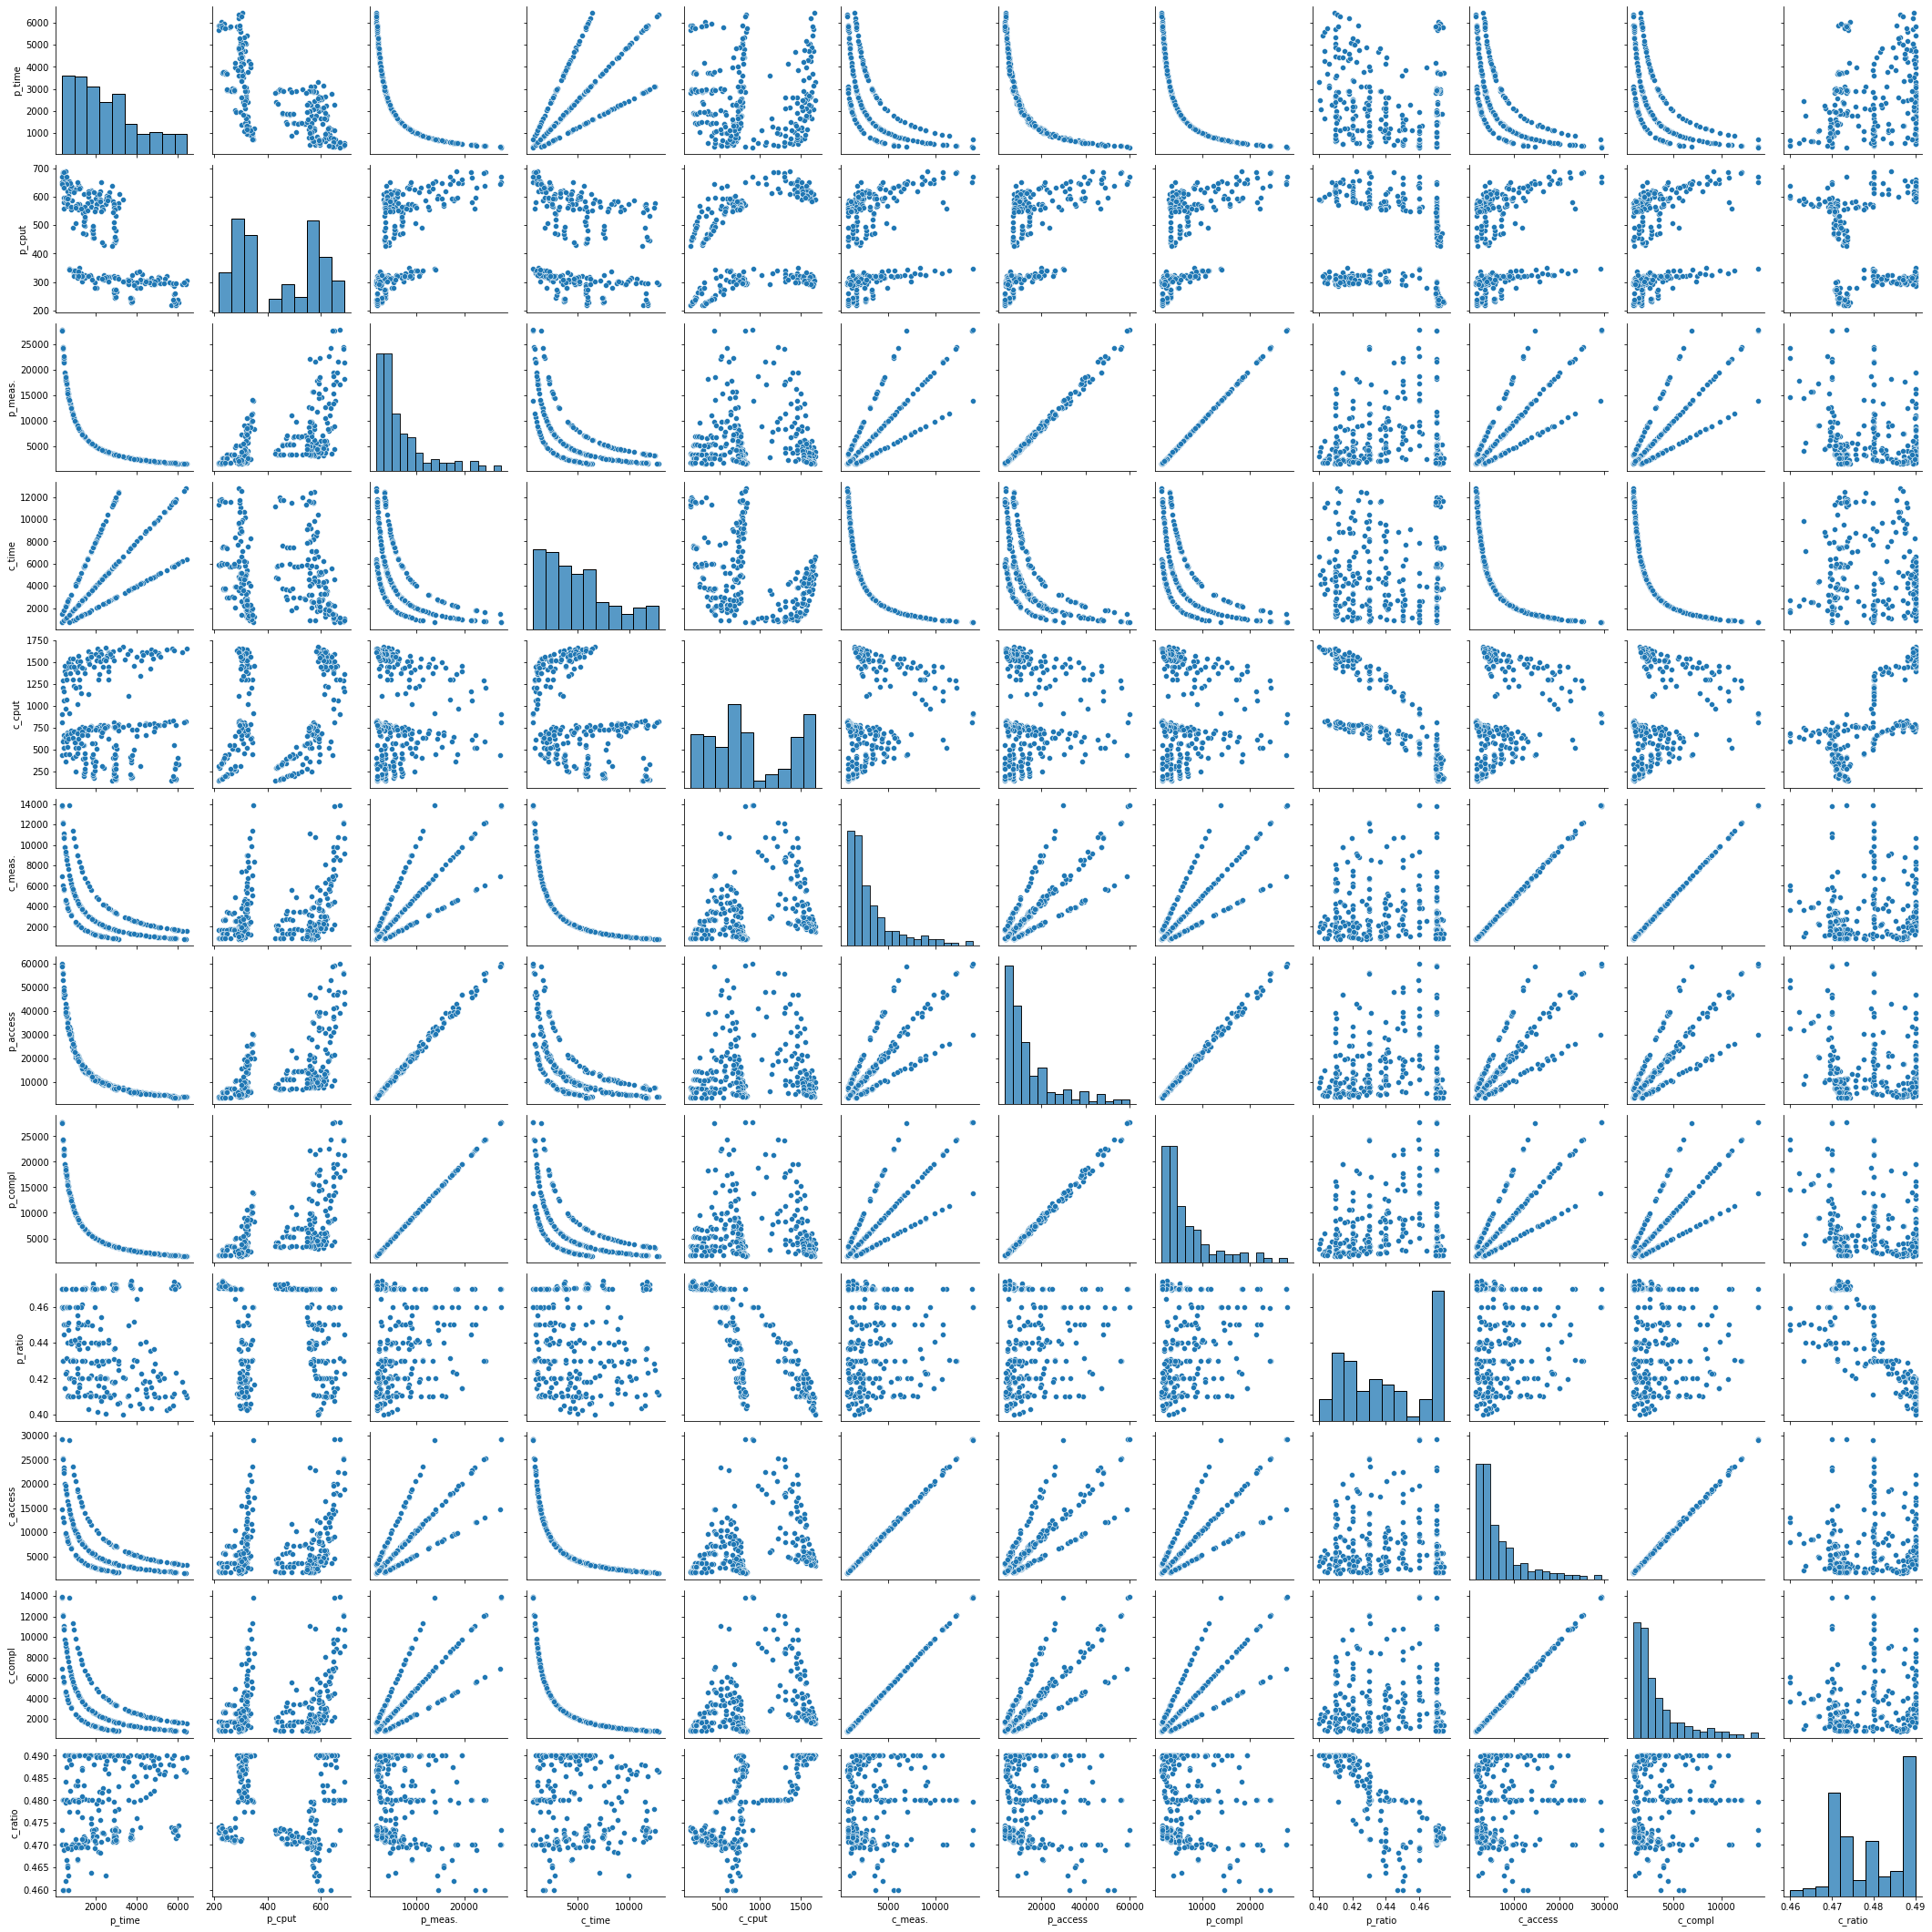

In [9]:
# k3 = sns.pairplot(finalOnlyResultsForBuffer)
# k3.fig.savefig('pair3.png')

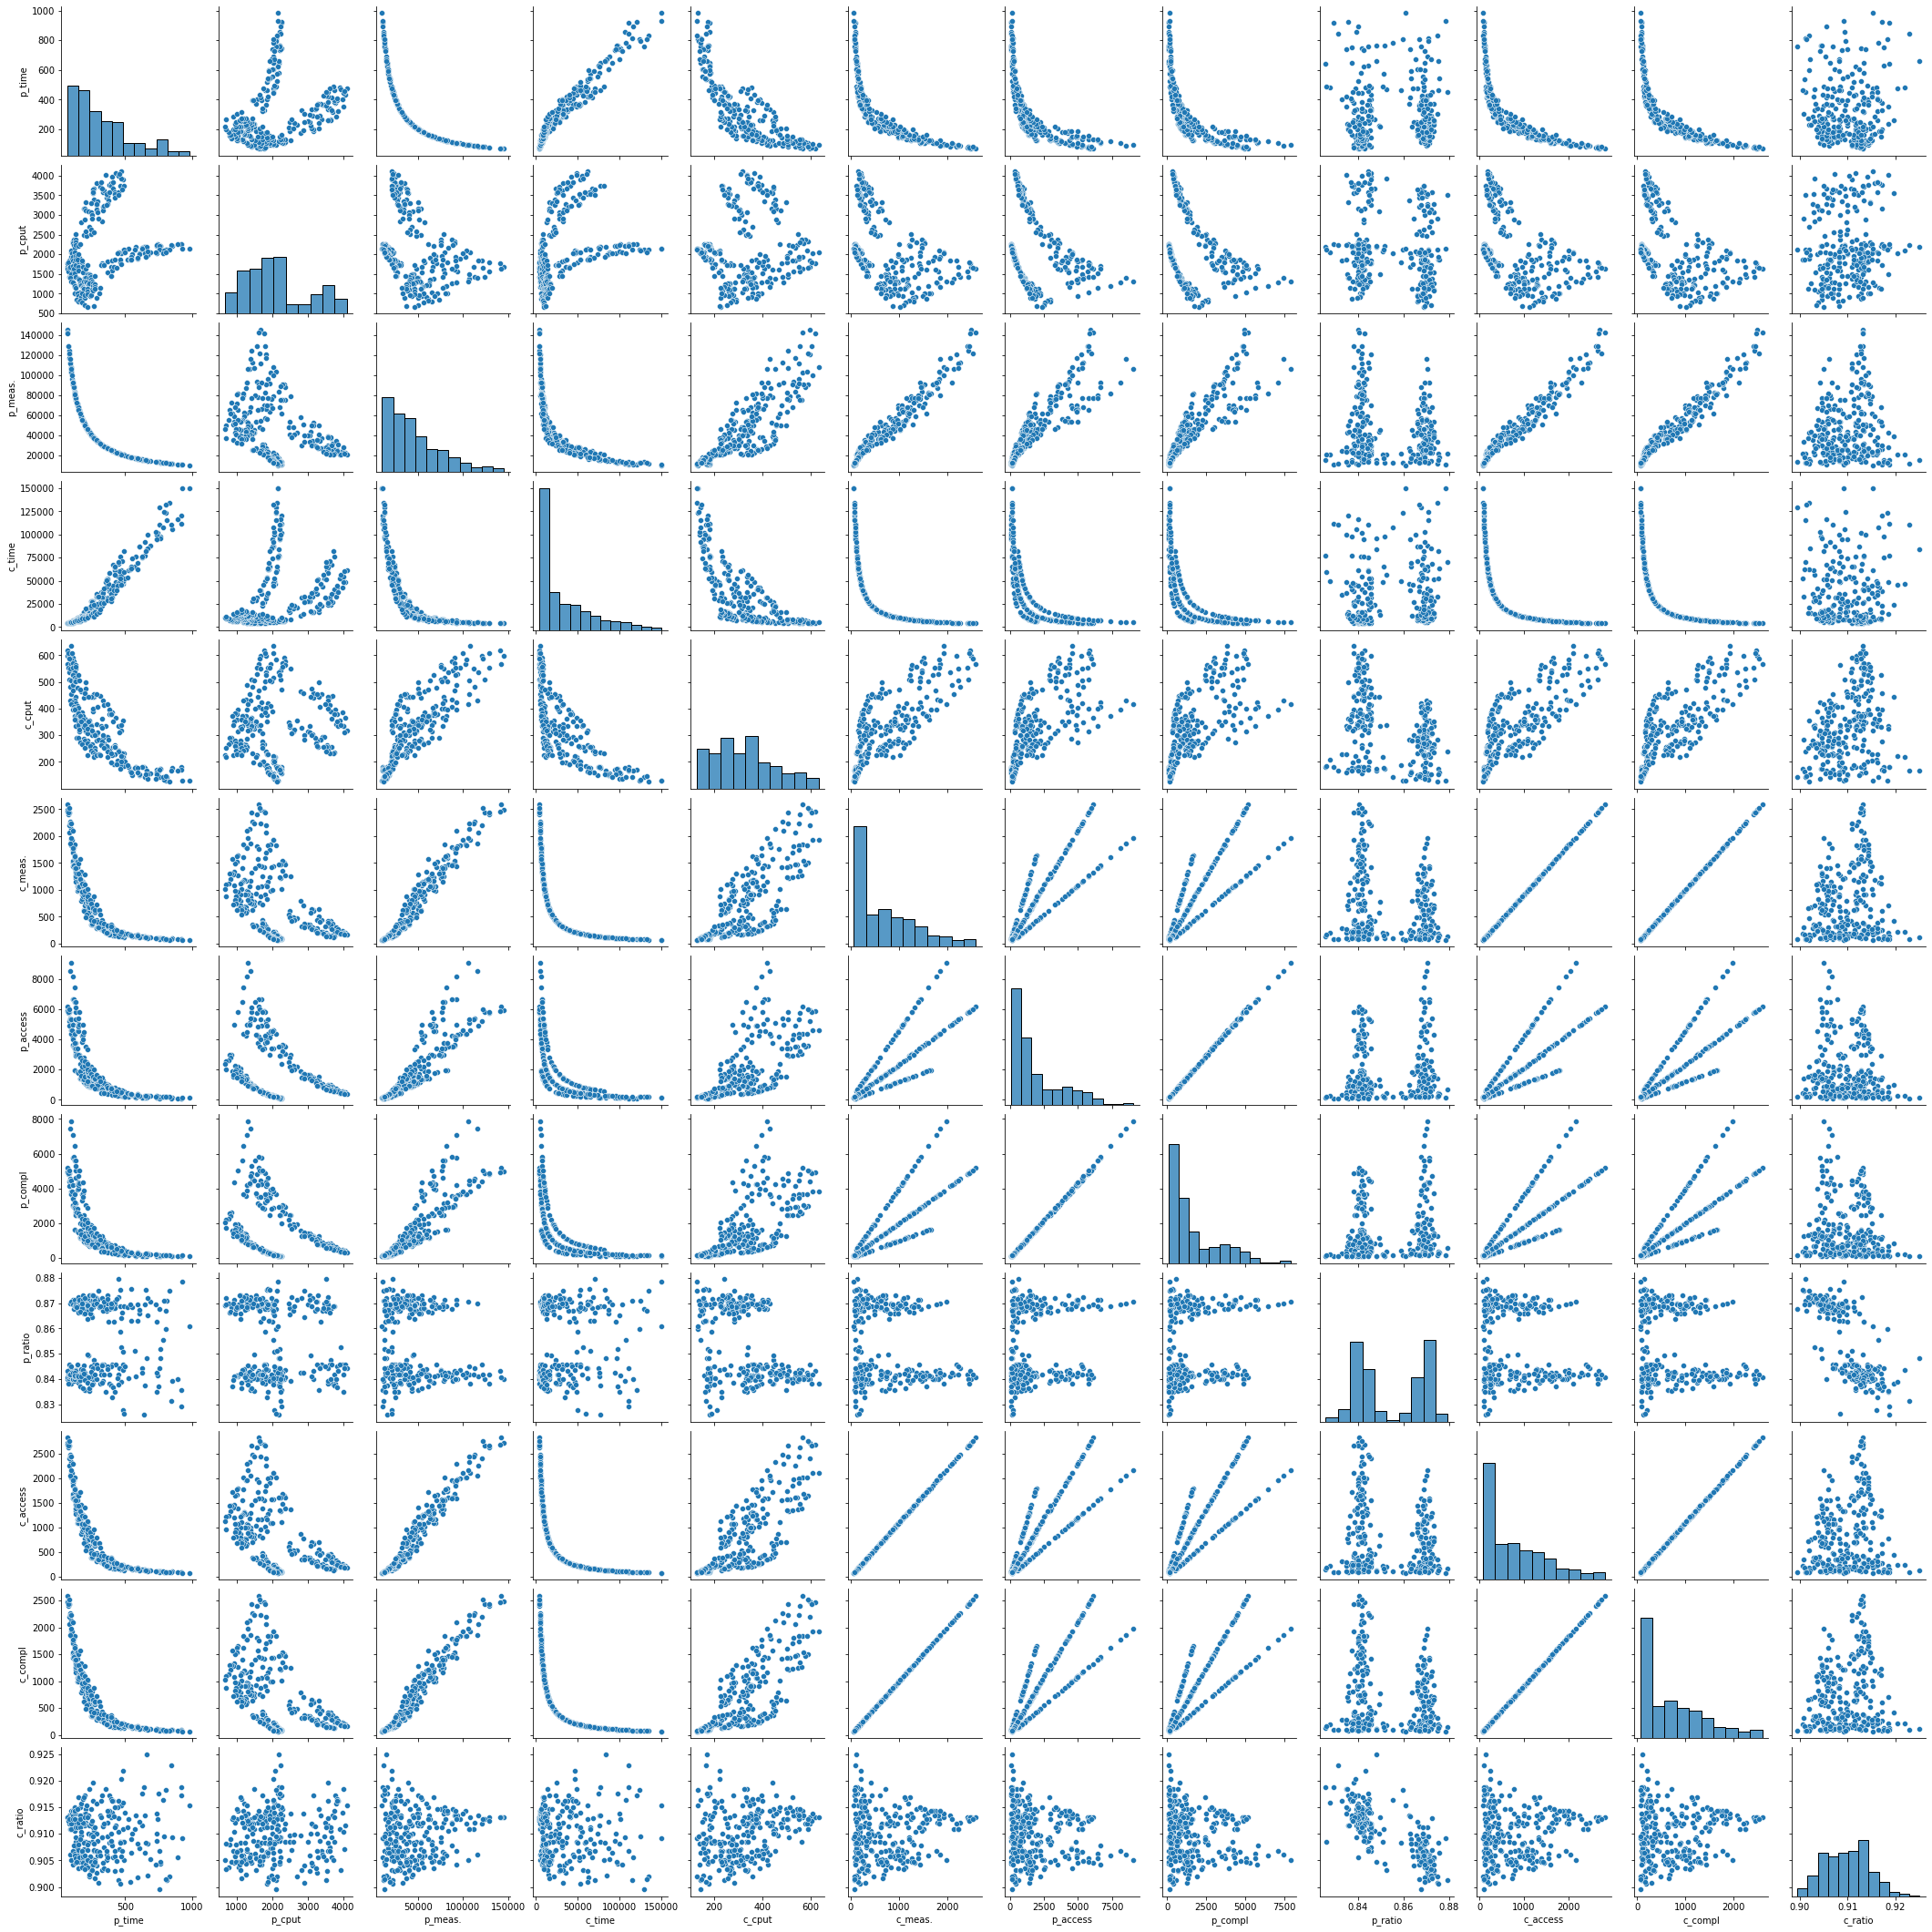

In [10]:
# k4 = sns.pairplot(finalOnlyResultsForFinalActObject)
# k4.fig.savefig('pair4.png')

In [31]:
queryMainData = lambda dataframe: dataframe.query('p_numb == 3')\
                                           .query('c_numb == 3')\
                                           .query('complReqOptNumbCoeff == 100')\
                                           .query('bufferSize == 100')

In [32]:
measuresBuffer = queryMainData(measuresBufferFull)
measuresActObject = queryMainData(measuresActObjectFull)

In [33]:
hue='p_time'
unit='[micro sec]'
measVal = hue + " " + unit

hue2='c_time'
unit2='[micro sec]'
measVal2 = hue2 + " " + unit2

param2 = 'actionCostCoeff'
param1 = 'optNumbCoeff'

top=0.9

annot=False

pivotedForBuffer = pd.pivot_table(measuresBuffer, values=hue, 
                     index=[param1], 
                     columns=param2)
pivotedForActObject = pd.pivot_table(measuresActObject, values=hue, 
                     index=[param1], 
                     columns=param2)

[Text(0.5, 1.0, 'wykres 5\n monitor:p_time [micro sec]')]

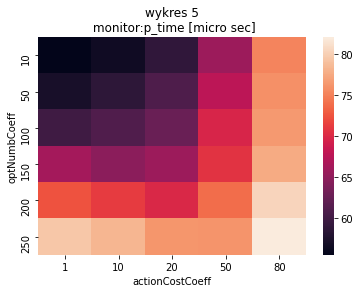

In [34]:
sns.heatmap(pivotedForBuffer, annot=annot).set(title="wykres 5\n monitor:" + measVal)


[Text(0.5, 1.0, 'wykres 6\n actObj:p_time [micro sec]')]

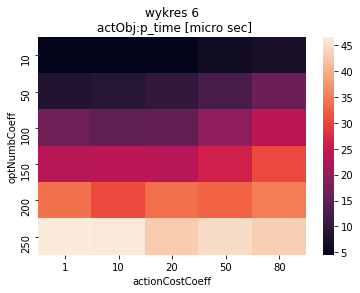

In [35]:
sns.heatmap(pivotedForActObject, annot=annot).set(title='wykres 6\n actObj:' + measVal)

[Text(0.5, 1.0, 'wykres 7\ns actObj vs monitr ratio of p_time [micro sec]')]

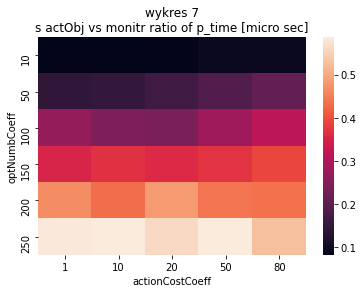

In [36]:
sns.heatmap(pivotedForActObject / pivotedForBuffer, annot=annot).set(title='wykres 7\n' + "s actObj vs monitr ratio of " + measVal)

In [37]:
def sub_plot_per_workers(index, columns, values, **kwargs):
    data = pd.DataFrame()
    data['index'] = index
    data['columns'] = columns
    data['values'] = values
    pivotedDataFrame = pd.pivot_table(data, values='values', 
                     index=['index'], 
                     columns='columns')
    sns.heatmap(pivotedDataFrame, annot=annot)

In [38]:
queryData = lambda dataframe: dataframe.query('complReqOptNumbCoeff == 200')\
                                       .query('bufferSize == 100')

In [39]:
row='p_numb'
col='c_numb'

In [40]:
dataForByWorkersNumbersForBuffer = queryData(measuresBufferFull)
dataForByWorkersNumbersForActObject = queryData(measuresActObjectFull)

# Pierwsze pomiary

## p_time

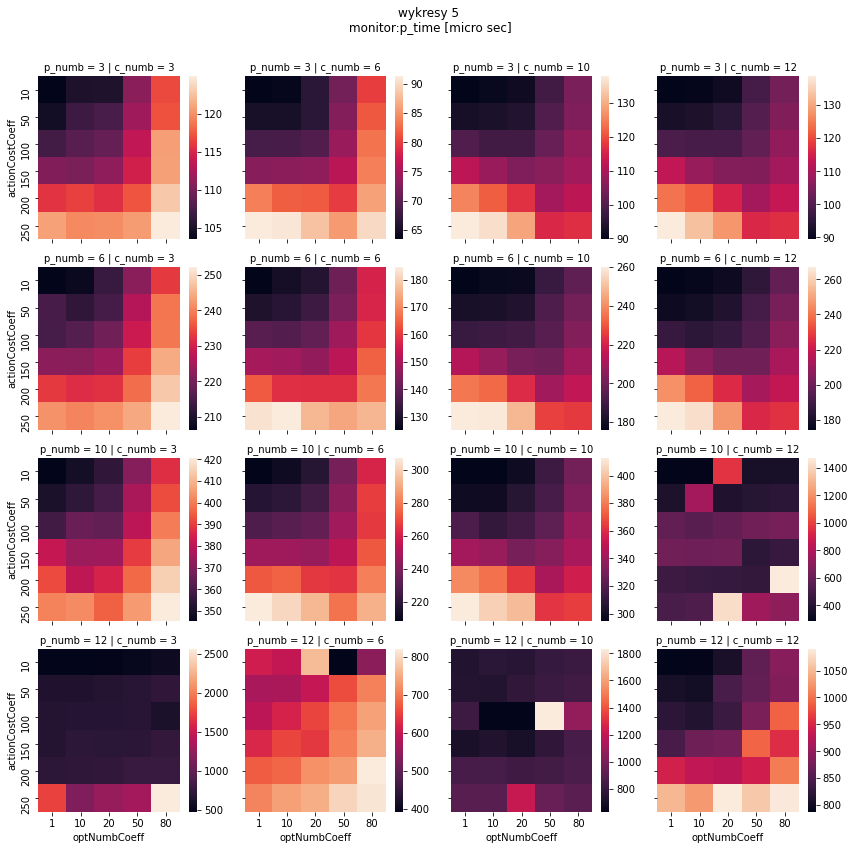

In [51]:
g1 = sns.FacetGrid(dataForByWorkersNumbersForBuffer, row=row, col=col).set(title=hue)
g1.map(sub_plot_per_workers, param1, param2, hue)

title = 'wykresy 5\n monitor:' + measVal
g1.fig.subplots_adjust(top=top)
g1.fig.suptitle(title)
g1.fig.savefig(title + ".png")

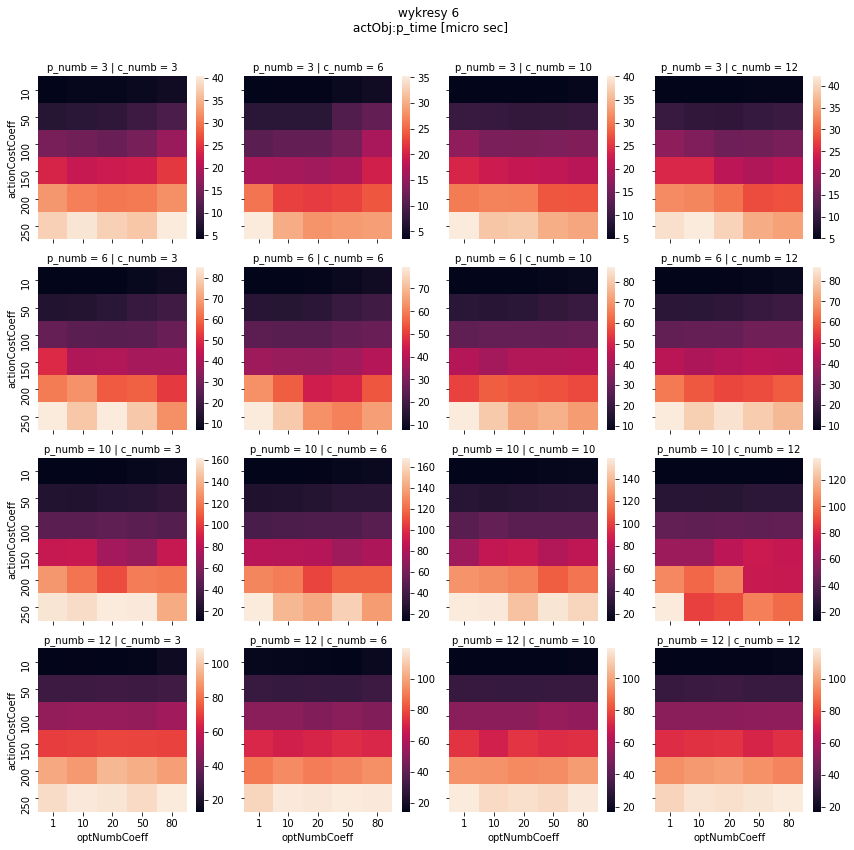

In [52]:
g2 = sns.FacetGrid(dataForByWorkersNumbersForActObject, row='p_numb', col='c_numb').set(title=hue)
g2.map(sub_plot_per_workers, param1, param2, hue)

title = 'wykresy 6\n actObj:' + measVal
g2.fig.subplots_adjust(top=top)
g2.fig.suptitle(title)
g2.fig.savefig(title + ".png")

# c_time

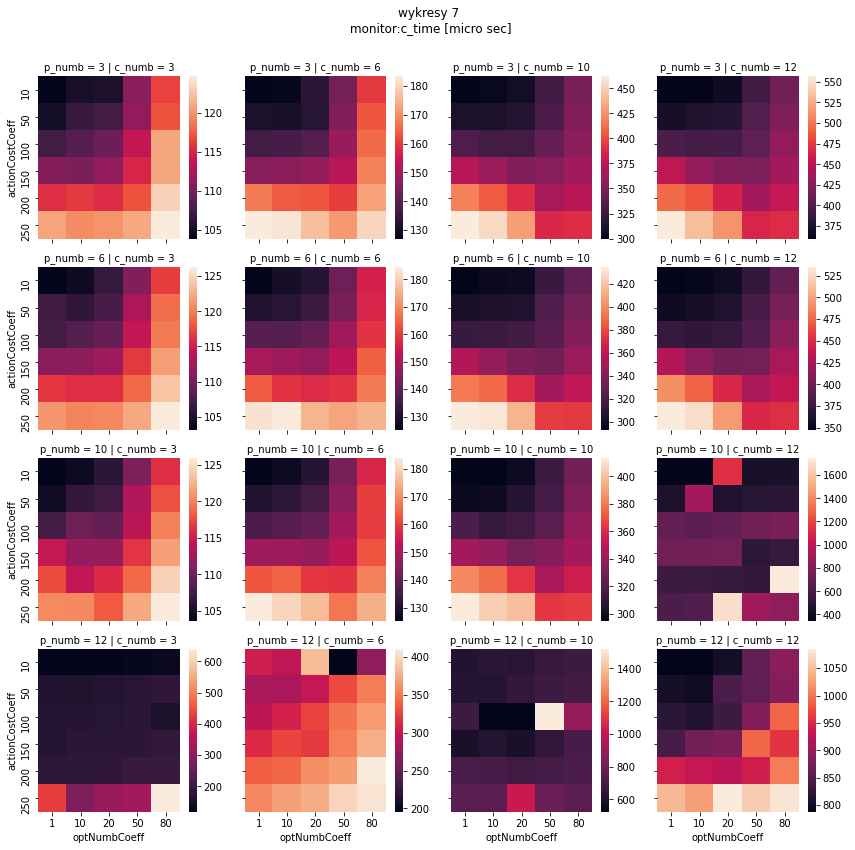

In [53]:
g3 = sns.FacetGrid(dataForByWorkersNumbersForBuffer, row='p_numb', col='c_numb').set(title=hue)
g3.map(sub_plot_per_workers, param1, param2, hue2)

title = 'wykresy 7\n monitor:' + measVal2
g3.fig.subplots_adjust(top=top)
g3.fig.suptitle(title)
g3.fig.savefig(title + ".png")

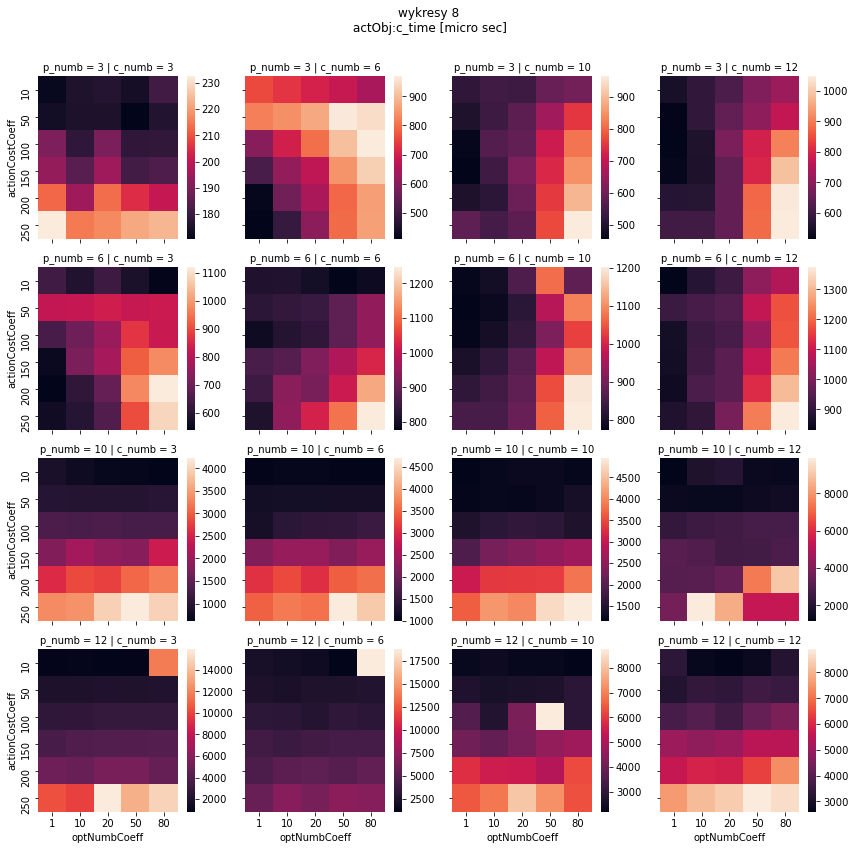

In [54]:
g4 = sns.FacetGrid(dataForByWorkersNumbersForActObject, row='p_numb', col='c_numb').set(title=hue)
g4.map(sub_plot_per_workers, param1, param2, hue2)

title = 'wykresy 8\n actObj:' + measVal2
g4.fig.subplots_adjust(top=top)
g4.fig.suptitle(title)
g4.fig.savefig(title + ".png")

# Drugie pomiary

In [55]:
height = 6

## p_time

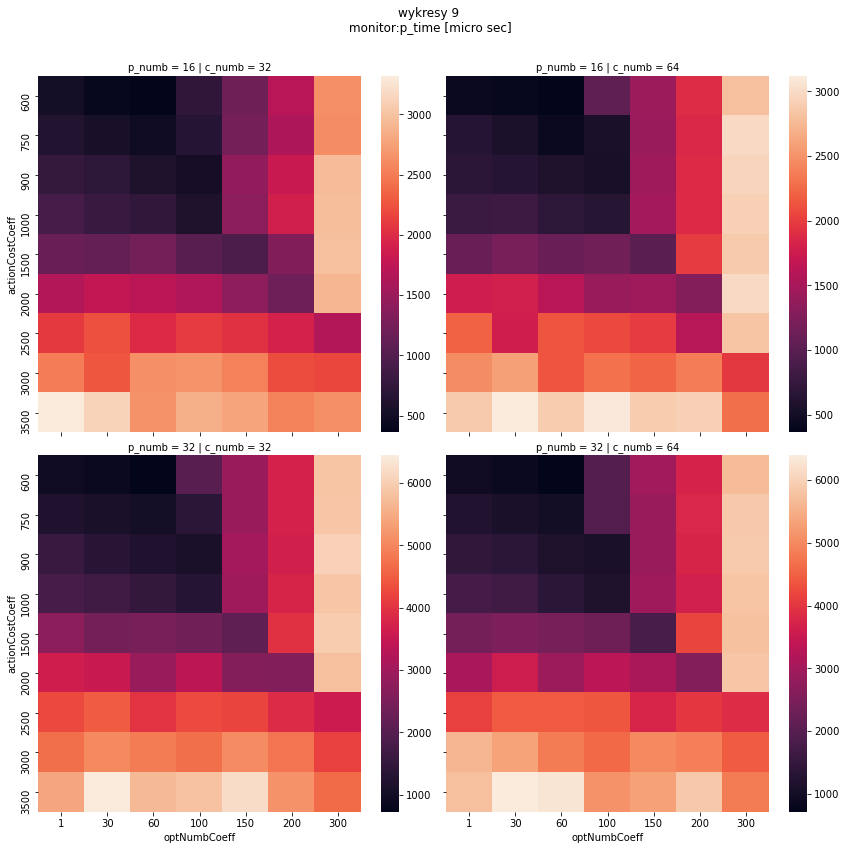

In [56]:
g5 = sns.FacetGrid(finalMeasuresBuffer, row=row, col=col, height=height).set(title=hue)
g5.map(sub_plot_per_workers, param1, param2, hue)

title = 'wykresy 9\n monitor:' + measVal
g5.fig.subplots_adjust(top=top)
g5.fig.suptitle(title)
g5.fig.savefig(title + ".png")

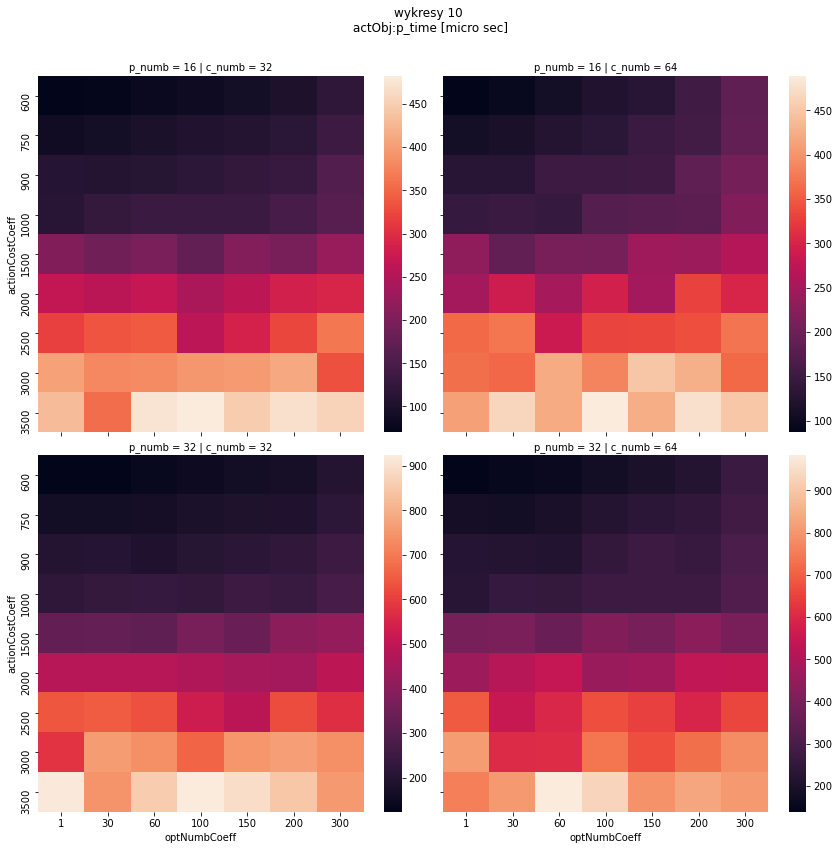

In [57]:
g6 = sns.FacetGrid(finalMeasuresActObject, row=row, col=col, height=height).set(title=hue)
g6.map(sub_plot_per_workers, param1, param2, hue)

title = 'wykresy 10\n actObj:' + measVal
g6.fig.subplots_adjust(top=top)
g6.fig.suptitle(title)
g6.fig.savefig(title + ".png")

## c_time

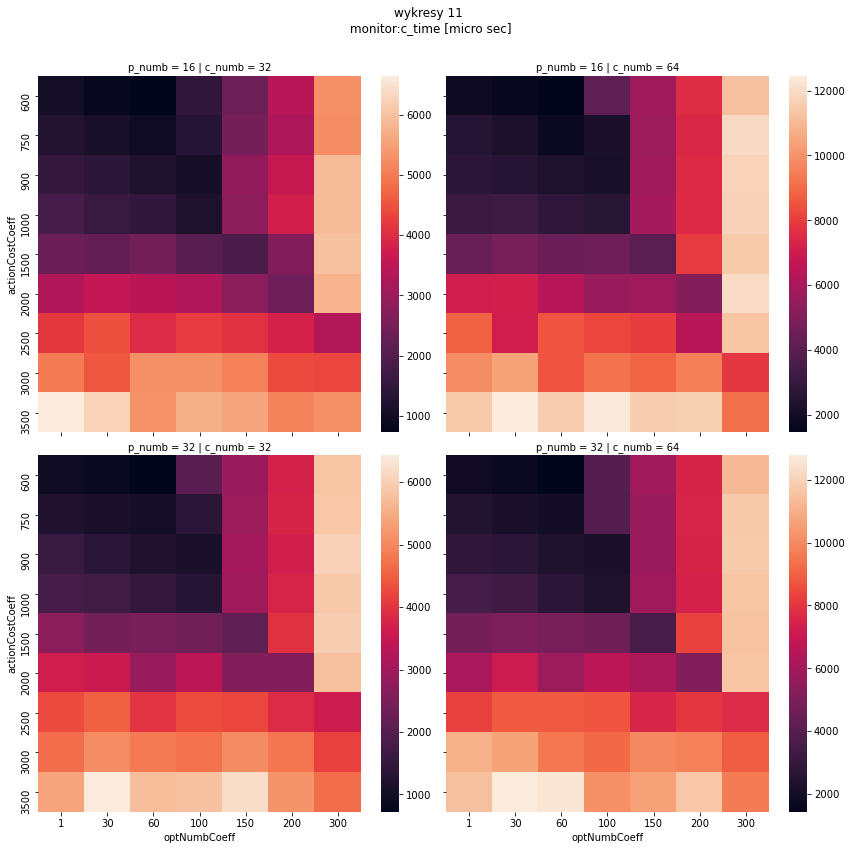

In [58]:

g7 = sns.FacetGrid(finalMeasuresBuffer, row=row, col=col, height=height).set(title=hue)
g7.map(sub_plot_per_workers, param1, param2, hue2)

title = 'wykresy 11\n monitor:' + measVal2
g7.fig.subplots_adjust(top=top)
g7.fig.suptitle(title)
g7.fig.savefig(title + ".png")

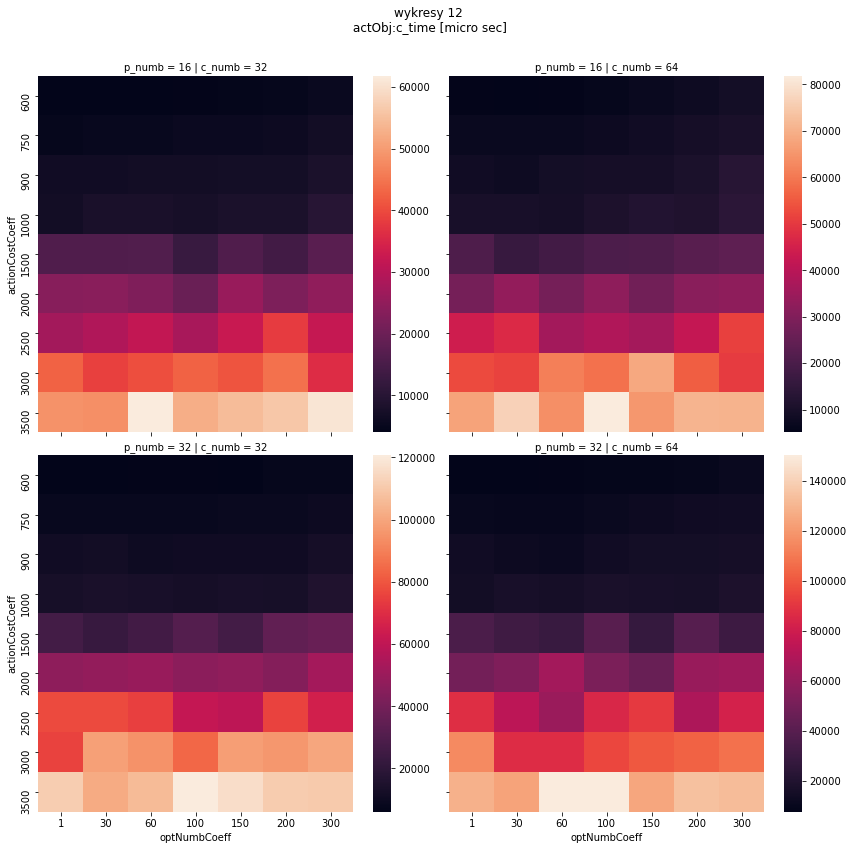

In [59]:
g8 = sns.FacetGrid(finalMeasuresActObject, row=row, col=col, height=height).set(title=hue)
g8.map(sub_plot_per_workers, param1, param2, hue2)

title = 'wykresy 12\n actObj:' + measVal2
g8.fig.subplots_adjust(top=top)
g8.fig.suptitle(title)
g8.fig.savefig(title + ".png")

In [60]:
finalMeasuresActObject

p_numb  c_numb  bufferSize  optNumbCoeff  complReqOptNumbCoeff  \
1        16      32         100           600                    10   
2        16      32         100           600                    10   
3        16      32         100           600                    10   
4        16      32         100           600                    10   
5        16      32         100           600                    10   
..      ...     ...         ...           ...                   ...   
262      32      64         100          1500                    10   
263      32      64         100          2000                    10   
264      32      64         100          2500                    10   
265      32      64         100          3000                    10   
266      32      64         100          3500                    10   

     actionCostCoeff      p_time       p_cput       p_meas.         c_time  \
1                  1   68.994375  1673.022500  145532.25000    4034.909063   
2                 30   70.548125  1628.167500  142303.50000    3864.459062   
3                 60   77.661875  1572.163750  129318.93750    4157.072187   
4                100   80.976250  1420.993750  124188.31250    4110.060625   
5                150   88.633750  1437.983750  113106.25000    4422.157812   
..               ...         ...          ...           ...            ...   
262              300  396.296250  1458.123750   25420.34375   30624.502656   
263              300  544.000625  1867.108750   18521.25000   63642.787188   
264              300  657.592188  1939.984063   15398.28125   82371.995469   
265              300  784.506562  2035.831563   12886.93750  107551.291719   
266              300  805.383437  2041.449375   12669.75000  132596.377344   

         c_cput      c_meas.    p_access     p_compl   p_ratio     c_access  \
1    599.027500  2481.500000  5899.93750  4959.81250  0.840000  2716.218750   
2    567.602813  2588.093750  6148.68750  5172.75000  0.840625  2832.218750   
3    555.038750  2407.812500  5726.25000  4828.18750  0.841875  2636.093750   
4    507.862813  2433.375000  5791.93750  4866.37500  0.840000  2667.937500   
5    481.818750  2262.468750  5384.12500  4538.62500  0.844375  2481.468750   
..          ...          ...         ...         ...       ...          ...   
262  199.105781   326.828125   751.03125   651.43750  0.869688   359.859375   
263  159.232500   157.500000   362.40625   316.53125  0.875625   173.906250   
264  153.969063   121.703125   280.28125   245.65625  0.875312   134.187500   
265  142.420781    93.125000   212.18750   182.06250  0.855313   101.796875   
266  145.787500    75.640625   175.09375   153.09375  0.866875    83.828125   

         c_compl   c_ratio  
1    2481.500000  0.913125  
2    2588.093750  0.913125  
3    2407.812500  0.913125  
4    2433.375000  0.912813  
5    2262.468750  0.912188  
..           ...       ...  
262   326.828125  0.908750  
263   157.500000  0.906406  
264   121.703125  0.908281  
265    93.125000  0.916406  
266    75.640625  0.901406  

[266 rows x 18 columns]